In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_csv('C:\\Users\\SUVARNA\\Food Recommendation\\Data Processing\\recent_activity.csv')
df_data = pd.read_csv('C:\\Users\SUVARNA\\Food Recommendation\\Data Processing\\dataset.csv')
df.head(10)

,User_Id,Meal_Id,Rated,Liked,Searched,Purchased,Timestamp
0,User_7,meal_id6,1,0,0,1,2020-03-01 20:05:40
1,User_83,meal_id12,0,0,1,0,2020-03-04 08:22:40
2,User_30,meal_id13,1,0,0,1,2020-03-04 18:25:30
3,User_40,meal_id16,0,0,1,1,2020-03-04 20:26:04
4,User_30,meal_id18,0,0,1,1,2020-03-05 22:33:26
5,User_49,meal_id19,1,0,0,0,2020-03-06 02:34:34
6,User_45,meal_id20,0,0,1,1,2020-03-07 18:45:54
7,User_5,meal_id21,0,0,1,1,2020-03-09 04:55:32
8,User_99,meal_id22,1,0,0,0,2020-03-10 09:03:28
9,User_99,meal_id23,0,0,1,0,2020-03-10 11:04:02


In [2]:
meal_ids = list(df.Meal_Id.unique())
recent_data = df_data[df_data.Meal_Id.isin(meal_ids)][['Nutrient','catagory','Disease','Diet']].reset_index(drop=True)

calcium          27
magnesium        16
iron             15
protien           8
selenium          6
vitamin_e         6
carbohydrates     5
fiber             4
chloride          1
Name: Nutrient, dtype: int64


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

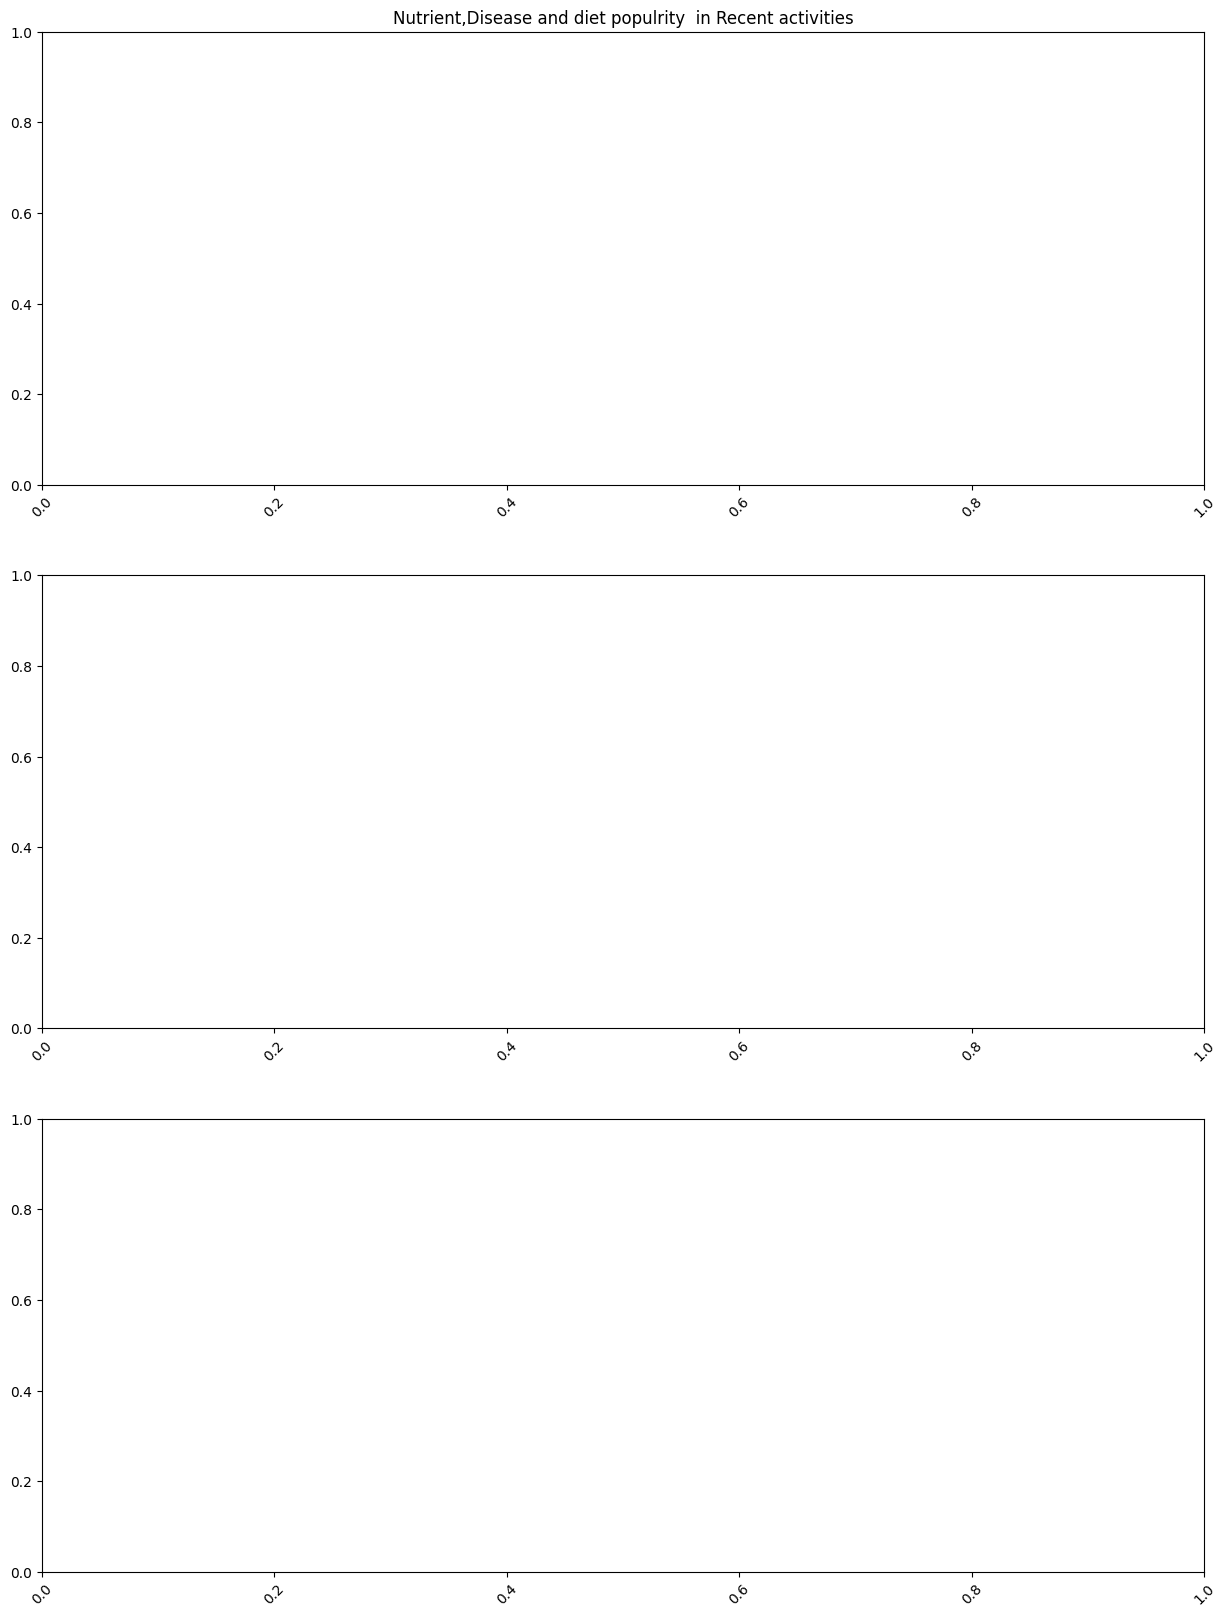

In [4]:
plt.figure(figsize=(15,20))
plt.subplot(3,1,1)
plt.xticks(rotation=45)
plt.title('Nutrient,Disease and diet populrity  in Recent activities')
print(recent_data.Nutrient.value_counts())

#sns.countplot(recent_data.Nutrient)
disease = []
for i in range(recent_data.shape[0]):
    for j in recent_data.loc[i,'Disease'].split():
        disease.append(j)

plt.subplot(3,1,2)    
#sns.countplot(disease)
plt.xticks(rotation=45)

diet = []
for i in range(recent_data.shape[0]):
    for j in recent_data.loc[i,'Diet'].split():
        diet.append(j)

plt.subplot(3,1,3)    
#sns.countplot(diet)
plt.xticks(rotation=45)

In [5]:
value_counts = recent_data.Nutrient.value_counts()
m = recent_data.Nutrient.value_counts().mean()
print('mean occurance',m)
features = list(value_counts[recent_data.Nutrient.value_counts()>m].index)
value_counts[recent_data.Nutrient.value_counts()>m]

mean occurance 9.777777777777779


calcium      27
magnesium    16
iron         15
Name: Nutrient, dtype: int64

In [6]:
a = dict(Counter(disease))
# a = sorted(a.items(),key = lambda k:k[1],reverse=True)
print('mean occurance',np.mean(list(a.values())))
m = np.mean(list(a.values()))
for i in a.items():
    if i[1]>m:
        print(i)
        features.append(i[0])

mean occurance 33.18181818181818
('heart_disease', 34)
('goitre', 67)
('pregnancy', 40)
('diabeties', 60)
('obesity', 41)


In [7]:
a = dict(Counter(diet))
# a = sorted(a.items(),key = lambda k:k[1],reverse=True)
print('mean occurance',np.mean(list(a.values())))
m = np.mean(list(a.values()))
for i in a.items():
    if i[1]>m:
        print(i)
        features.append(i[0])

mean occurance 53.714285714285715
('ketogenic_diet', 81)
('high_protien_diet', 73)
('low_fat_diet', 63)
('vegan_diet', 64)
('high_fiber_diet', 58)


In [8]:
print(features)

['calcium', 'magnesium', 'iron', 'heart_disease', 'goitre', 'pregnancy', 'diabeties', 'obesity', 'ketogenic_diet', 'high_protien_diet', 'low_fat_diet', 'vegan_diet', 'high_fiber_diet']
